In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('/content/ReadDynamicEnergy.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X, y)

# Now you can use this model to predict read dynamic energy for new data
# For example, if you want to predict read dynamic energy for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [512]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Predicting read dynamic energy for new data
predicted_read_dynamic_energy = model.predict(new_data)
print("Predicted Read Dynamic Energy:", predicted_read_dynamic_energy)


Training Accuracy: 0.8851814867063087
Predicted Read Dynamic Energy: [[38348.637  58321.402  37513.486  62344.959  40111.463  66368.545
  42707.393  70392.112  41548.38   74415.698  42110.316  78439.273
  42674.331  80297.777  30518.671  21357.853  31745.063  21107.102
  32971.472  21227.202  34197.881  21347.313  35424.279  21465.281
  36650.696  21583.319  39249.628   7938.1741  3879.0254  8245.8186
   3901.4696  8551.3721  3923.9132  8859.0233  3946.3582  9164.5691
   3966.6994  9472.2221  3913.708    129.7326]]


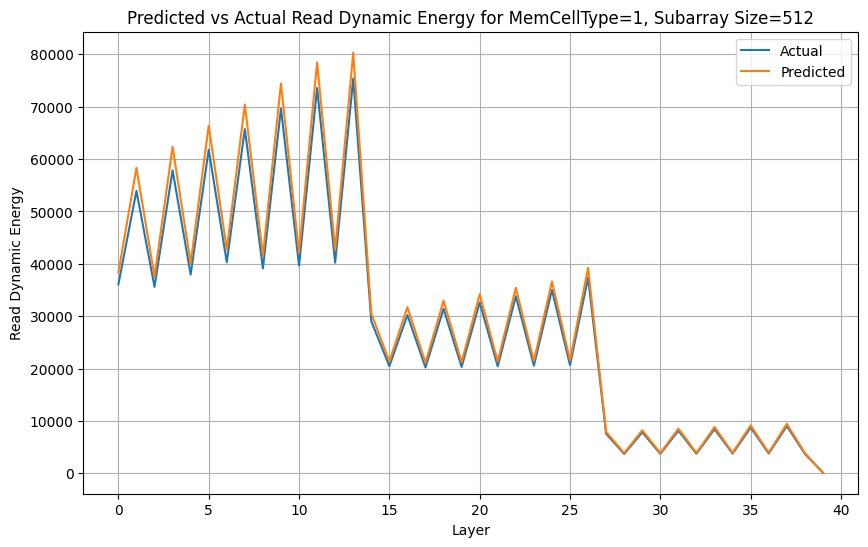

In [33]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual read dynamic energy values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted read dynamic energy and the actual read dynamic energy values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_read_dynamic_energy[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('Read Dynamic Energy')
plt.title(f'Predicted vs Actual Read Dynamic Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.8356521387720888


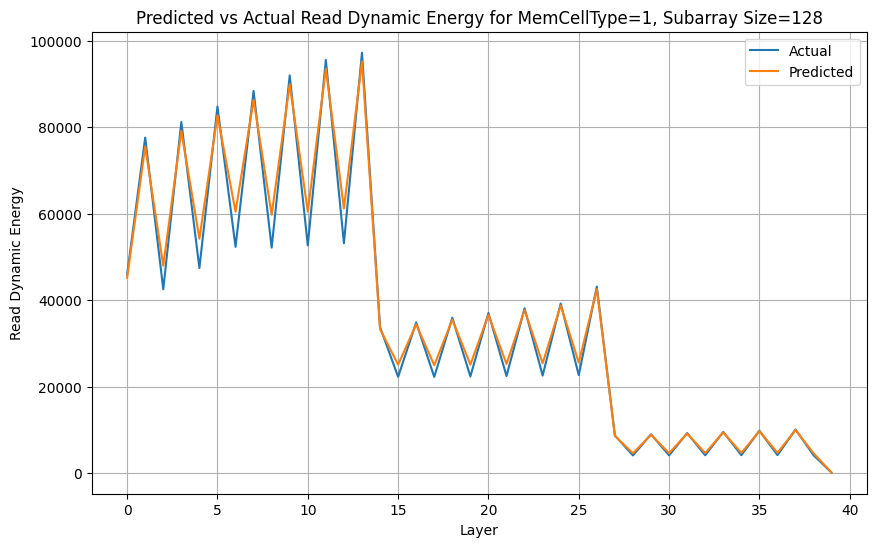

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/ReadDynamicEnergy.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X_train, y_train)

# Predicting read dynamic energy for the testing data
predicted_read_dynamic_energy_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual read dynamic energy values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual read dynamic energy values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual read dynamic energy values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_read_dynamic_energy_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('Read Dynamic Energy')
    plt.title(f'Predicted vs Actual Read Dynamic Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")
